Visual Attention in CNNs
==========================

In [1]:
%matplotlib inline

from model import AttnVGG_after as VGGnet
import utilities

import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision import utils

In [2]:
# Init network
im_size = 32
net = VGGnet(im_size=im_size, num_classes=100, attention=True,
             normalize_attn=True, init='xavierUniform')

# Load network from file
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.DataParallel(net).to(device)
model.load_state_dict(torch.load(f"nets/net.pth", map_location=device))

<All keys matched successfully>

In [7]:
# Setup data transformation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

# Load CIFAR-100 data and apply transformation, enable shuffling
testset = torchvision.datasets.CIFAR100(
    root='CIFAR100_data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=True, num_workers=5)

Files already downloaded and verified


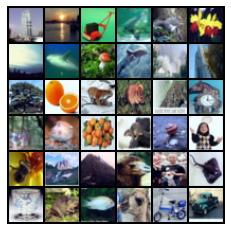

In [27]:
# Get all images
images, _ = next(iter(testloader))

# Take first 36 images
images = images[0:36]
# Organize them on a square grid
images_grid = utils.make_grid(images, nrow=6, normalize=True, scale_each=True)

plt.imshow(images_grid.permute(1, 2, 0))
plt.axis('off')

# Apply the model to get compatibility scores
_, c1, c2, c3 = model(images)
cs = [c1, c2, c3]

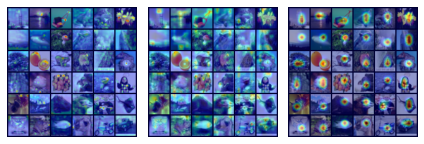

In [32]:
fig, axes = plt.subplots(1, 3)

for i, c in enumerate(cs):
    # Apply softmax to compatibility scores
    attn_grid = utilities.visualize_attn_softmax(
        images_grid, c, up_factor=2**(i+1), nrow=6).permute(1, 2, 0)
    axes[i].imshow(attn_grid)
    axes[i].axis('off')

plt.tight_layout()

**Exercises:**
1. In the previous cell, use the `sigmoid` visualization (instead of `softmax`) from the `utilities` module.